In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#Creamos el dataframe a partir del set de datos y les asigno un tipo acorde a las descripciones
df = pd.read_csv('train.csv', dtype={'id':'int', 'titulo':'object','descripcion':'object',\
                                           'tipodepropiedad':'category', 'direccion':'object',\
                                           'ciudad':'category', 'provincia':'category',\
                                           'antiguedad':'float', 'habitaciones':'float',\
                                           'garages':'float','banos':'float',\
                                           'metroscubiertos':'float', 'metrostotales':'float',\
                                           'idzona':'float', 'lat':'float', 'lng':'float',\
                                           'gimnasio':'bool', 'usosmultiples':'bool',\
                                           'piscina':'bool', 'escuelascercanas':'bool',\
                                           'centroscomercialescercanos':'bool',\
                                           'precio':'float'}, parse_dates=['fecha'])

In [3]:
(df.memory_usage() / (1024 * 1024)).sum()

29.573829650878906

In [4]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23,False,False,False,False,False,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28,False,False,False,True,True,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17,False,False,False,False,False,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09,False,False,False,True,True,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07,False,False,False,False,False,1150000.0


In [5]:
df.isnull().sum()

id                                 0
titulo                          5387
descripcion                     1619
tipodepropiedad                   46
direccion                      53072
ciudad                           372
provincia                        155
antiguedad                     43555
habitaciones                   22471
garages                        37765
banos                          26221
metroscubiertos                17400
metrostotales                  51467
idzona                         28621
lat                           123488
lng                           123488
fecha                              0
gimnasio                           0
usosmultiples                      0
piscina                            0
escuelascercanas                   0
centroscomercialescercanos         0
precio                             0
dtype: int64

Text(0, 0.5, 'Cantidad publicaciones')

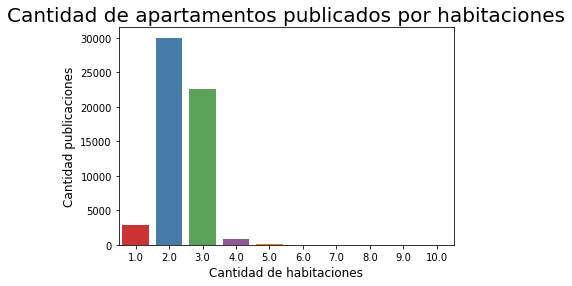

In [6]:
df_cant_hab_apartamentos = df[df.tipodepropiedad == "Apartamento"].groupby(df.habitaciones).size()
grafico_habitaciones_apartamento = sns.barplot(x=df_cant_hab_apartamentos.index,y=df_cant_hab_apartamentos.values,orient='v',palette="Set1",order = df_cant_hab_apartamentos.index)
grafico_habitaciones_apartamento.set_title("Cantidad de apartamentos publicados por habitaciones",fontsize=20)
grafico_habitaciones_apartamento.set_xlabel("Cantidad de habitaciones",fontsize=12)
grafico_habitaciones_apartamento.set_ylabel("Cantidad publicaciones",fontsize=12)

Text(0, 0.5, 'Cantidad publicaciones')

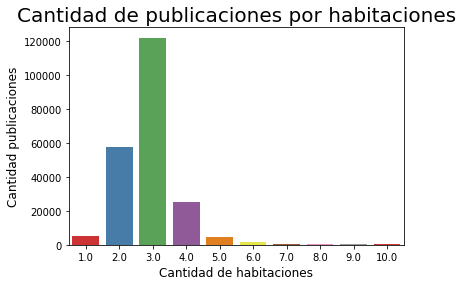

In [7]:
df_cant_habitaciones = df.groupby(df.habitaciones).size()
grafico_habitaciones_publicacion = sns.barplot(x=df_cant_habitaciones.index,y=df_cant_habitaciones.values,orient='v',palette="Set1",order = df_cant_habitaciones.index)
grafico_habitaciones_publicacion.set_title("Cantidad de publicaciones por habitaciones",fontsize=20)
grafico_habitaciones_publicacion.set_xlabel("Cantidad de habitaciones",fontsize=12)
grafico_habitaciones_publicacion.set_ylabel("Cantidad publicaciones",fontsize=12)

Text(0, 0.5, 'Cantidad publicaciones')

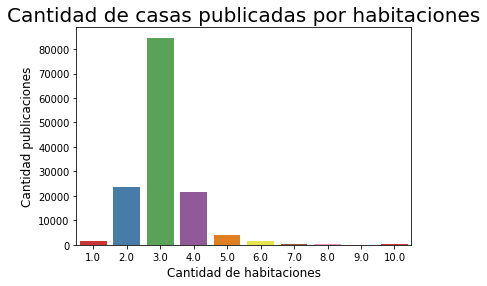

In [8]:
df_cant_hab_casas = df[df.tipodepropiedad == "Casa"].groupby(df.habitaciones).size()
grafico_habitaciones_casas = sns.barplot(x=df_cant_hab_casas.index,y=df_cant_hab_casas.values,orient='v',palette="Set1",order = df_cant_hab_casas.index)
grafico_habitaciones_casas.set_title("Cantidad de casas publicadas por habitaciones",fontsize=20)
grafico_habitaciones_casas.set_xlabel("Cantidad de habitaciones",fontsize=12)
grafico_habitaciones_casas.set_ylabel("Cantidad publicaciones",fontsize=12)

In [9]:
df_usd = pd.read_csv('dolar.csv', sep=',')

In [10]:
df_usd.head()

,Fecha,Valor USD
0,02/01/2012,13.9342
1,03/01/2012,13.6882
2,04/01/2012,13.7144
3,05/01/2012,13.7409
4,06/01/2012,13.7228


In [11]:
df_usd['fecha'] = pd.to_datetime(df_usd['Fecha'], dayfirst=True)

In [12]:
df_usd.head()

,Fecha,Valor USD,fecha
0,02/01/2012,13.9342,2012-01-02
1,03/01/2012,13.6882,2012-01-03
2,04/01/2012,13.7144,2012-01-04
3,05/01/2012,13.7409,2012-01-05
4,06/01/2012,13.7228,2012-01-06


In [13]:
df_merged = pd.merge(df, df_usd, on='fecha', how='inner')
df.id.count()

240000

In [14]:
def precio_usd(row):
    return row['precio'] / row['Valor USD']
df_merged['precioUSD'] = df_merged.apply (lambda row: precio_usd(row), axis=1)

In [15]:
df_merged.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,Fecha,Valor USD,precioUSD
0,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,2013-06-28,False,False,False,True,True,3600000.0,28/06/2013,13.0279,276330.030166
1,137214,"casa en lomas suaves excelente zona, remate hi...",<p>caracter&iacute;sticas de la operaci&oacute...,Casa,"Circuito Educadores, Ciudad Satelite Naucalpan...",Naucalpan de Juárez,Edo. de México,20.0,3.0,2.0,...,2013-06-28,False,False,False,False,False,3500000.0,28/06/2013,13.0279,268654.195995
2,144952,casa en venta en martel del valle,<p>sala&nbsp;</p>\r\n<p>comedor&nbsp;</p>\r\n<...,Casa,valle orquideas 95,Zapopan,Jalisco,6.0,3.0,1.0,...,2013-06-28,False,False,False,True,False,623000.0,28/06/2013,13.0279,47820.446887
3,44775,casa unidad barrientos tlalnepantla de baz,<p>es un terreno de 216 m2 y 250 m2 de constru...,Casa,AV CIRCUNVALACIÓN 90,Tlalnepantla de Baz,Edo. de México,10.0,5.0,2.0,...,2013-06-28,False,False,False,True,False,1600000.0,28/06/2013,13.0279,122813.346740
4,249230,hermosa residencia en privada arboledas queret...,<p>la casa tipo minimalista se encuentra en un...,Casa en condominio,Anillo Vial Fray Junípero Serra 1550,Querétaro,Querétaro,4.0,3.0,2.0,...,2013-06-28,False,False,False,True,True,2950000.0,28/06/2013,13.0279,226437.108053


In [16]:
def precio_metro_cubierto(row):
    return row['precio'] / row['metroscubiertos']
df['preciometrocubierto'] = df.apply (lambda row: precio_metro_cubierto(row), axis=1)

In [17]:
df.preciometrocubierto.count()

222600

In [18]:
df['year'] = df.apply(lambda row: row['fecha'].year, axis = 1)
df['month'] = df.apply(lambda row: row['fecha'].month, axis = 1)

In [19]:
df_by_year = df.groupby('year')

In [20]:
df_2012 = df_by_year.get_group(2012)

In [21]:
mean_2012 = df_2012.groupby('month').precio.mean()
print(mean_2012)

month
1     1.910287e+06
2     1.817815e+06
3     1.966355e+06
4     2.167271e+06
5     1.899124e+06
6     1.930387e+06
7     1.827299e+06
8     2.116829e+06
9     2.092780e+06
10    2.228157e+06
11    2.188357e+06
12    1.894108e+06
Name: precio, dtype: float64


<Figure size 432x288 with 0 Axes>

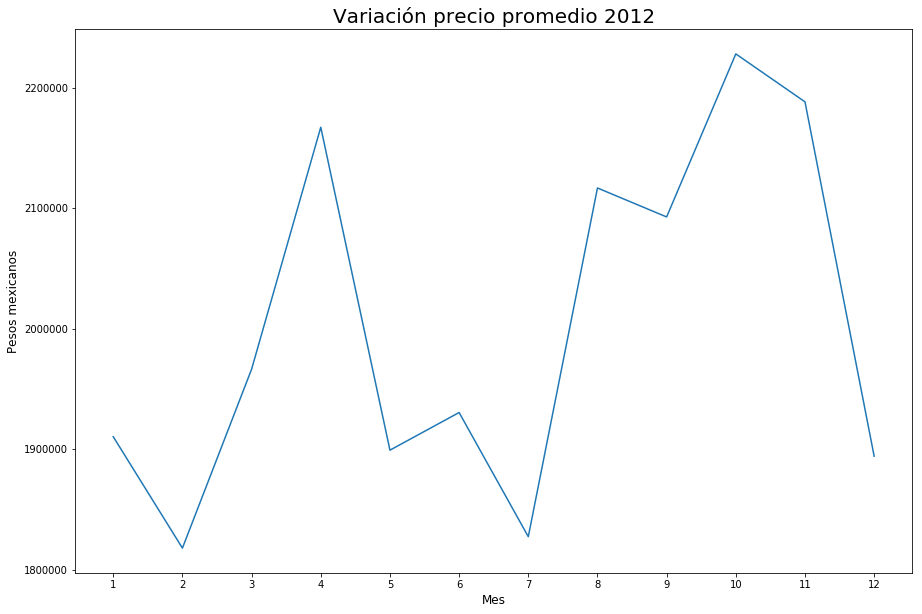

In [22]:
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2012.index, mean_2012.values)
plt.title('Variación precio promedio 2012', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pesos mexicanos', fontsize=12)
plt.xticks(mean_2012.index)
plt.savefig('precio_2012.png', bbox_inches = 'tight')
plt.show()

month
1     2.032821e+06
2     2.158046e+06
3     2.092788e+06
4     2.164533e+06
5     2.119536e+06
6     2.058968e+06
7     2.221331e+06
8     2.197108e+06
9     2.112627e+06
10    2.178859e+06
11    2.082401e+06
12    2.075765e+06
Name: precio, dtype: float64


<Figure size 432x288 with 0 Axes>

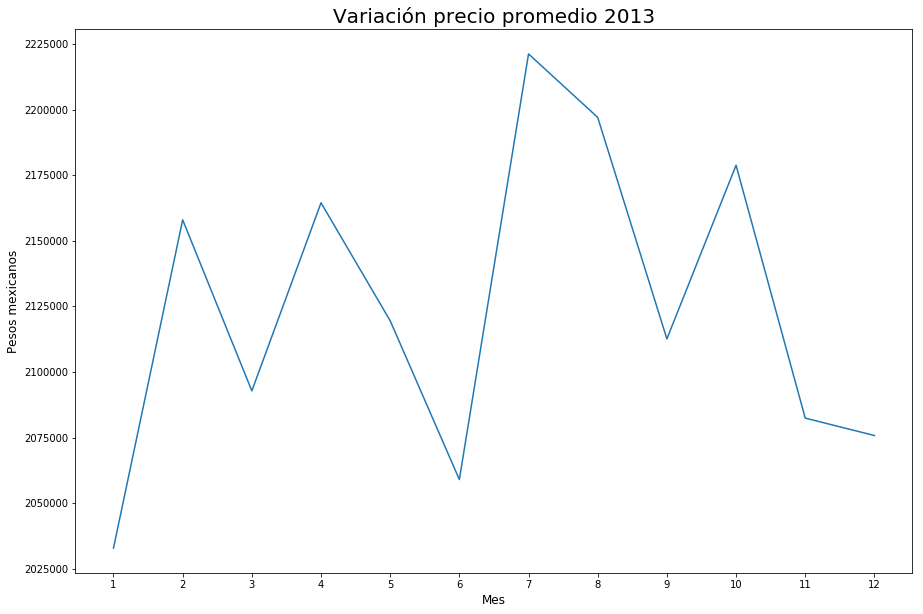

In [23]:
df_2013 = df_by_year.get_group(2013)
mean_2013 = df_2013.groupby('month').precio.mean()
print(mean_2013)
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2013.index, mean_2013.values)
plt.title('Variación precio promedio 2013', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pesos mexicanos', fontsize=12)
plt.xticks(mean_2013.index)
plt.savefig('precio_2013.png', bbox_inches = 'tight')
plt.show()

month
1     2.194887e+06
2     2.327649e+06
3     2.268509e+06
4     2.360991e+06
5     2.312620e+06
6     2.357717e+06
7     2.358130e+06
8     2.345646e+06
9     2.430109e+06
10    2.262678e+06
11    2.429327e+06
12    2.553107e+06
Name: precio, dtype: float64


<Figure size 432x288 with 0 Axes>

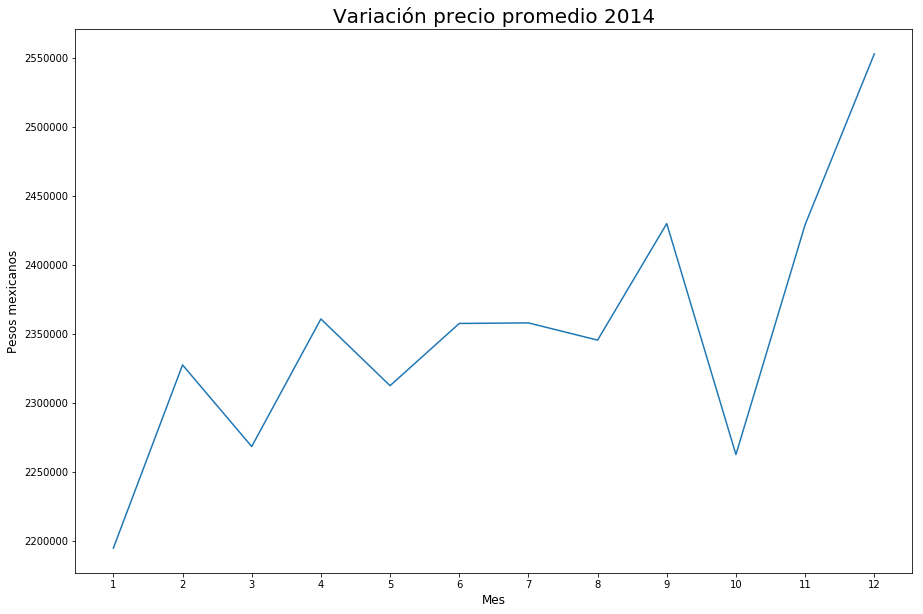

In [24]:
df_2014 = df_by_year.get_group(2014)
mean_2014 = df_2014.groupby('month').precio.mean()
print(mean_2014)
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2014.index, mean_2014.values)
plt.title('Variación precio promedio 2014', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pesos mexicanos', fontsize=12)
plt.xticks(mean_2014.index)
plt.savefig('precio_2014.png', bbox_inches = 'tight')
plt.show()

month
1     2.399791e+06
2     2.367704e+06
3     2.602794e+06
4     2.520666e+06
5     2.643570e+06
6     2.734104e+06
7     2.779177e+06
8     2.654494e+06
9     2.778324e+06
10    2.712010e+06
11    2.744396e+06
12    2.604719e+06
Name: precio, dtype: float64


<Figure size 432x288 with 0 Axes>

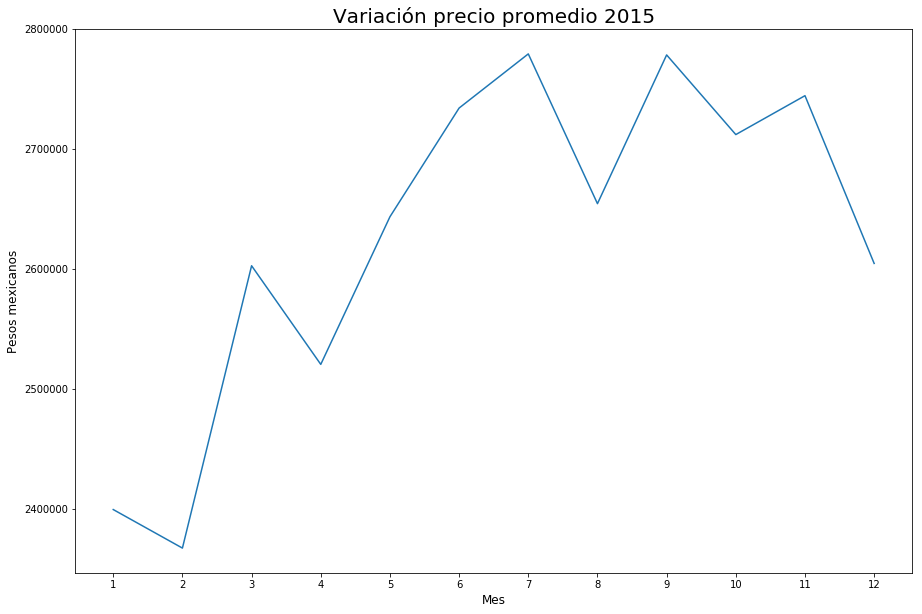

In [25]:
df_2015 = df_by_year.get_group(2015)
mean_2015 = df_2015.groupby('month').precio.mean()
print(mean_2015)
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2015.index, mean_2015.values)
plt.title('Variación precio promedio 2015', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pesos mexicanos', fontsize=12)
plt.xticks(mean_2014.index)
plt.savefig('precio_metrocubierto_2015.png', bbox_inches = 'tight')
plt.show()

month
1     2.688370e+06
2     2.695540e+06
3     2.807389e+06
4     2.827183e+06
5     2.726720e+06
6     2.744906e+06
7     2.882330e+06
8     2.880278e+06
9     2.918304e+06
10    2.825196e+06
11    2.824474e+06
12    2.792977e+06
Name: precio, dtype: float64


<Figure size 432x288 with 0 Axes>

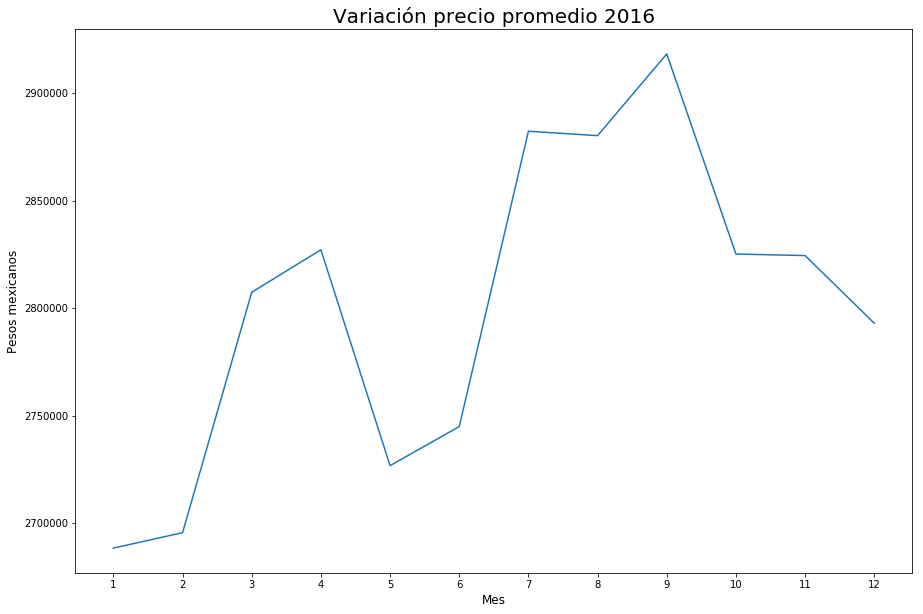

In [26]:
df_2016 = df_by_year.get_group(2016)
mean_2016 = df_2016.groupby('month').precio.mean()
print(mean_2016)
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, mean_2016.values)
plt.title('Variación precio promedio 2016', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pesos mexicanos', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('precio_2016.png', bbox_inches = 'tight')
plt.show()

In [29]:
df_inflacion = pd.read_csv('inflacion.csv',parse_dates=['Fecha'])

In [30]:
df_inflacion['year'] = df_inflacion.apply(lambda row: row['Fecha'].year,axis=1)
df_inflacion['mes'] = df_inflacion.apply(lambda row: row['Fecha'].month,axis=1)

In [31]:
df_inflacion.head()

,Fecha,Inflacion,SP30579,SP30578,SP74660,SP74661,SP74662,SP74663,SP74664,SP74665,year,mes
0,2012-01-01,0.71,0.71,4.05,0.45,0.45,3.34,1.55,1.55,6.38,2012,1
1,2012-01-02,0.20,0.91,3.87,0.43,0.88,3.37,-0.51,1.03,5.53,2012,1
2,2012-01-03,0.06,0.97,3.73,0.24,1.12,3.31,-0.55,0.48,5.12,2012,1
3,2012-01-04,-0.31,0.65,3.41,0.15,1.27,3.39,-1.84,-1.37,3.49,2012,1
4,2012-01-05,-0.32,0.34,3.85,0.27,1.54,3.48,-2.26,-3.59,5.15,2012,1


In [32]:
inflacion_anio = df_inflacion.groupby(df_inflacion['year'])

In [27]:
mean_2016_list = mean_2016.tolist()
init = mean_2015.tolist()[11]
variation_2016 = []
for i in range(12):
    variation_2016.append((mean_2016_list[i]/init - 1)*100)
    init = mean_2016_list[i]
print(variation_2016)

[3.211494634816092, 0.26670005058311297, 4.149430721963032, 0.7050596522436559, -3.5534731117126017, 0.6669714007732308, 5.006500450617457, -0.07118251858876379, 1.3201984741166406, -3.1904620767469694, -0.02555856813527546, -1.1151626373303025]


<Figure size 432x288 with 0 Axes>

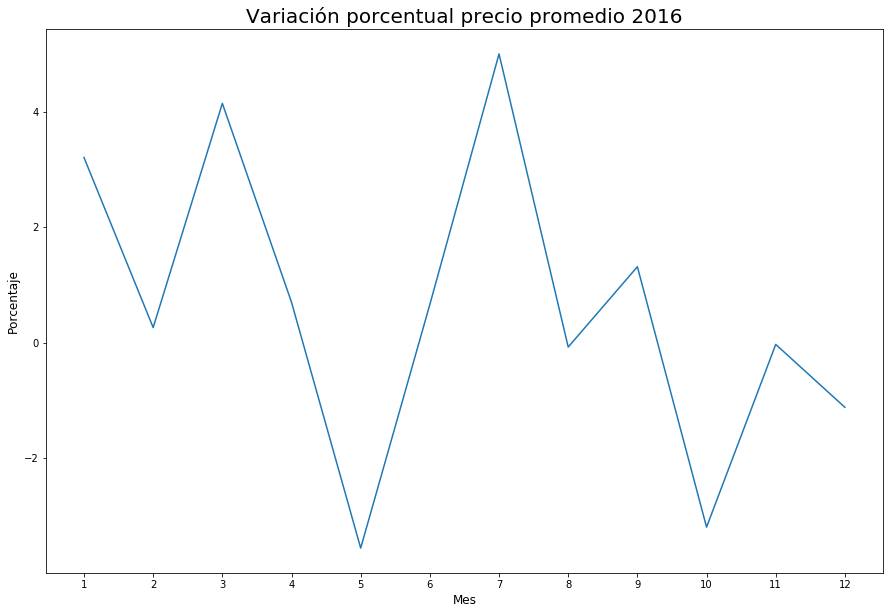

In [28]:
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, variation_2016)
plt.title('Variación porcentual precio promedio 2016', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('indice_variacion_2016.png', bbox_inches = 'tight')
plt.show()

<Figure size 432x288 with 0 Axes>

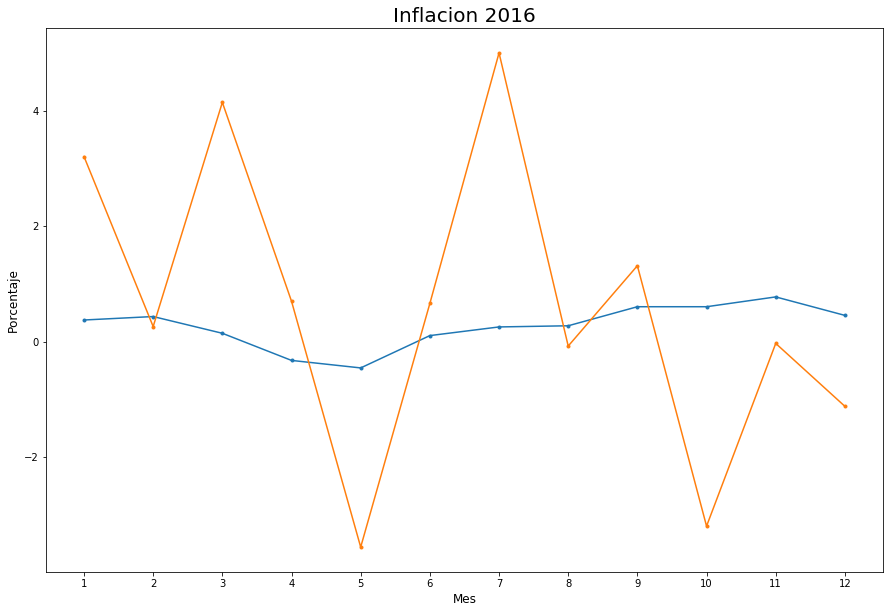

In [34]:
inflacion_2016 = inflacion_anio.get_group(2016)
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, inflacion_2016['Inflacion'], marker='.')
plt.plot(mean_2016.index, variation_2016, marker = '.')
plt.title('Inflacion 2016', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('inflacion_2016.png', bbox_inches = 'tight')
plt.show()

In [36]:
mean_2015_list = mean_2015.tolist()
init = mean_2014.tolist()[11]
variation_2015 = []
for i in range(12):
    variation_2015.append((mean_2015_list[i]/init - 1)*100)
    init = mean_2015_list[i]
print(variation_2015)

[-6.0050768686692795, -1.3370869883992387, 9.92903212971743, -3.1553898822240356, 4.875886496940929, 3.4246673139161077, 1.648566018817954, -4.486342960772982, 4.664905600757452, -2.3868181346165973, 1.1941539752109653, -5.089517039380054]


<Figure size 432x288 with 0 Axes>

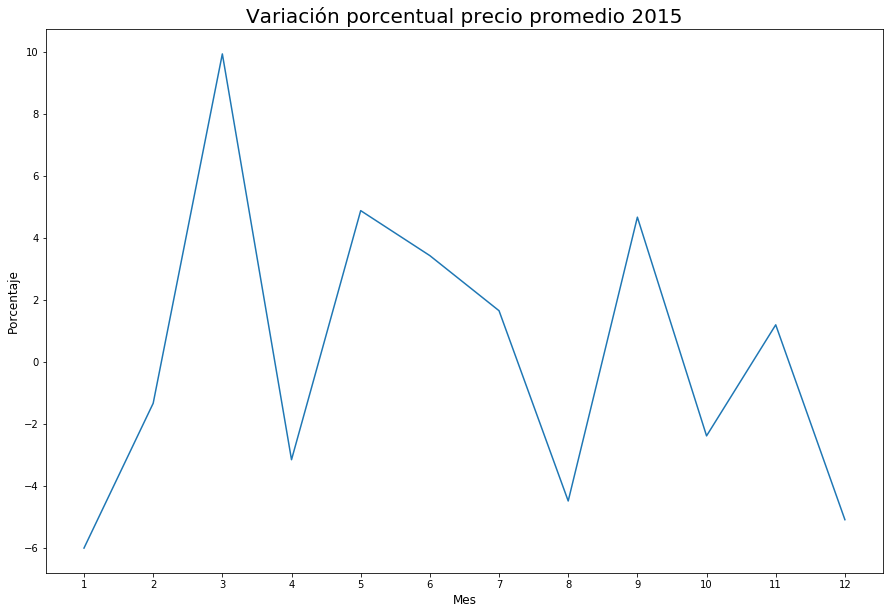

In [39]:
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, variation_2015)
plt.title('Variación porcentual precio promedio 2015', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('indice_variacion_2015.png', bbox_inches = 'tight')
plt.show()

36   -0.09
37    0.19
38    0.41
39   -0.26
40   -0.50
41    0.17
42    0.15
43    0.21
44    0.37
45    0.51
46    0.55
47    0.41
Name: Inflacion, dtype: float64


<Figure size 432x288 with 0 Axes>

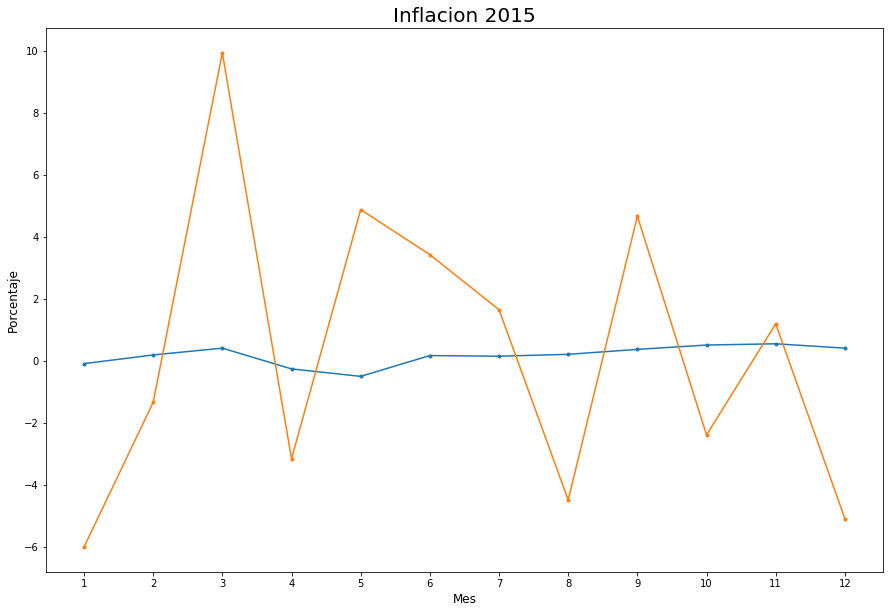

In [40]:
inflacion_2015 = inflacion_anio.get_group(2015)
print(inflacion_2015['Inflacion'])
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, inflacion_2015['Inflacion'], marker='.')
plt.plot(mean_2016.index, variation_2015, marker = '.')
plt.title('Inflacion 2015', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('inflacion_2015.png', bbox_inches = 'tight')
plt.show()

In [41]:
mean_2014_list = mean_2014.tolist()
init = mean_2013.tolist()[11]
variation_2014 = []
for i in range(12):
    variation_2014.append((mean_2014_list[i]/init - 1)*100)
    init = mean_2014_list[i]
print(variation_2014)

[5.738676902257578, 6.048692643775455, -2.5407621051801055, 4.076786620916484, -2.0487675454005205, 1.9500547951706748, 0.017500987518226374, -0.5294004198248214, 3.600836207418401, -6.889826516996312, 7.365096130139714, 5.095261914311533]


<Figure size 432x288 with 0 Axes>

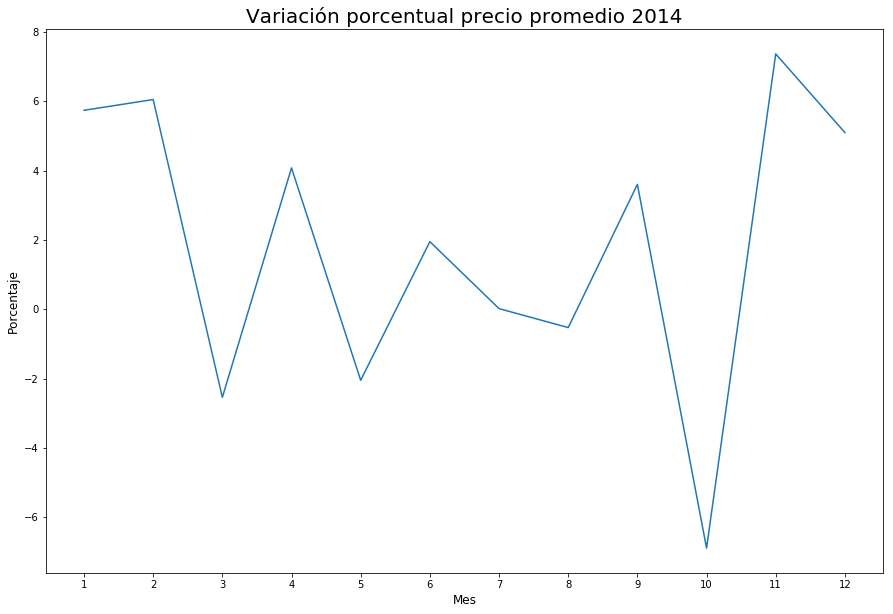

In [42]:
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, variation_2014)
plt.title('Variación porcentual precio promedio 2014', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('indice_variacion_2014.png', bbox_inches = 'tight')
plt.show()

24    0.89
25    0.25
26    0.27
27   -0.19
28   -0.32
29    0.17
30    0.28
31    0.36
32    0.44
33    0.55
34    0.81
35    0.49
Name: Inflacion, dtype: float64


<Figure size 432x288 with 0 Axes>

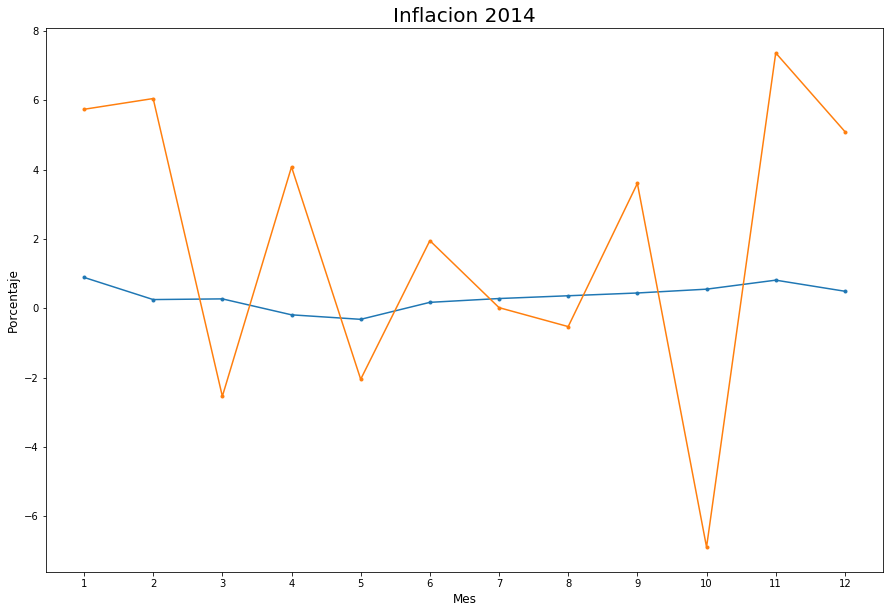

In [43]:
inflacion_2014 = inflacion_anio.get_group(2014)
print(inflacion_2014['Inflacion'])
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, inflacion_2014['Inflacion'], marker='.')
plt.plot(mean_2016.index, variation_2014, marker = '.')
plt.title('Inflacion 2014', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('inflacion_2014.png', bbox_inches = 'tight')
plt.show()

In [44]:
mean_2013_list = mean_2013.tolist()
init = mean_2012.tolist()[11]
variation_2013 = []
for i in range(12):
    variation_2013.append((mean_2013_list[i]/init - 1)*100)
    init = mean_2013_list[i]
print(variation_2013)

[7.323421319505763, 6.160160540798132, -3.023954985857047, 3.4282229349691384, -2.078845427378273, -2.857615219355092, 7.885647199113954, -1.0904666980304123, -3.8450789082086323, 3.135021265493565, -4.427003798666185, -0.31863972373070704]


<Figure size 432x288 with 0 Axes>

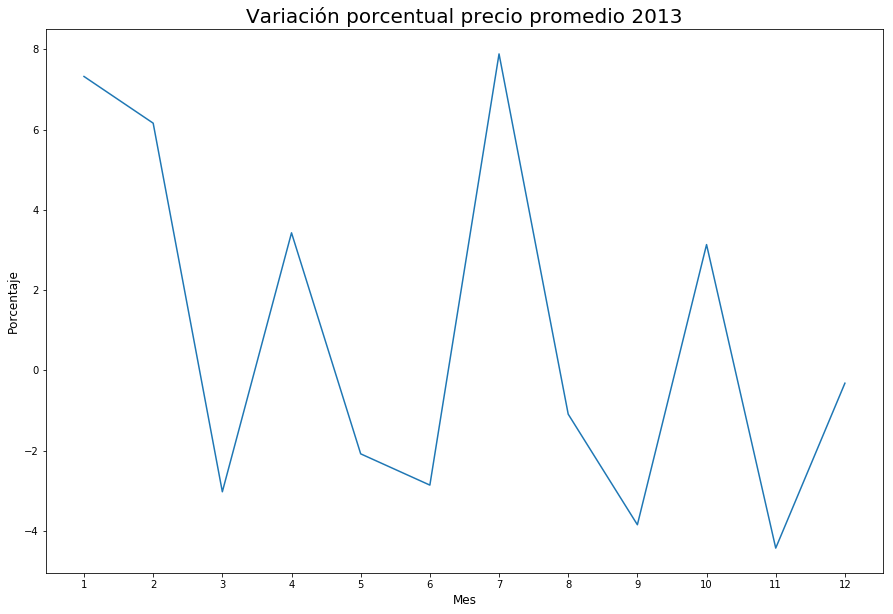

In [45]:
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, variation_2013)
plt.title('Variación porcentual precio promedio 2013', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('indice_variacion_2013.png', bbox_inches = 'tight')
plt.show()

12    0.40
13    0.49
14    0.73
15    0.07
16   -0.33
17   -0.06
18   -0.03
19    0.28
20    0.38
21    0.48
22    0.93
23    0.57
Name: Inflacion, dtype: float64


<Figure size 432x288 with 0 Axes>

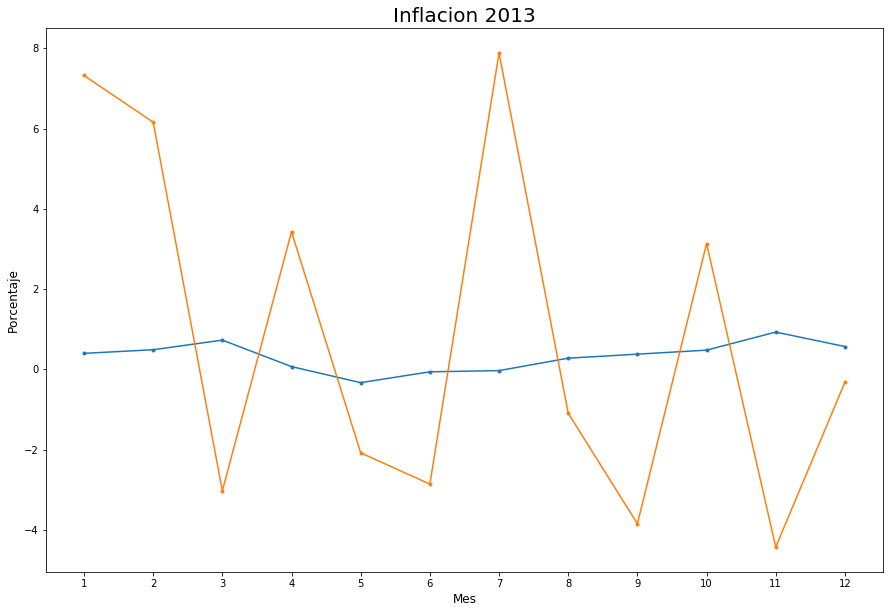

In [46]:
inflacion_2013 = inflacion_anio.get_group(2013)
print(inflacion_2013['Inflacion'])
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, inflacion_2013['Inflacion'], marker='.')
plt.plot(mean_2016.index, variation_2013, marker = '.')
plt.title('Inflacion 2013', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('inflacion_2013.png', bbox_inches = 'tight')
plt.show()

In [47]:
mean_2012_list = mean_2012.tolist()
init = mean_2012.tolist()[0]
variation_2012 = []
for i in range(12):
    variation_2012.append((mean_2012_list[i]/init - 1)*100)
    init = mean_2012_list[i]
print(variation_2012)

[0.0, -4.84075689470338, 8.171357465964647, 10.217682638993653, -12.37256914179592, 1.6462086274124044, -5.340319245862224, 15.844744450893188, -1.1361259978245775, 6.46877476564558, -1.786238251263561, -13.446112582903957]


<Figure size 432x288 with 0 Axes>

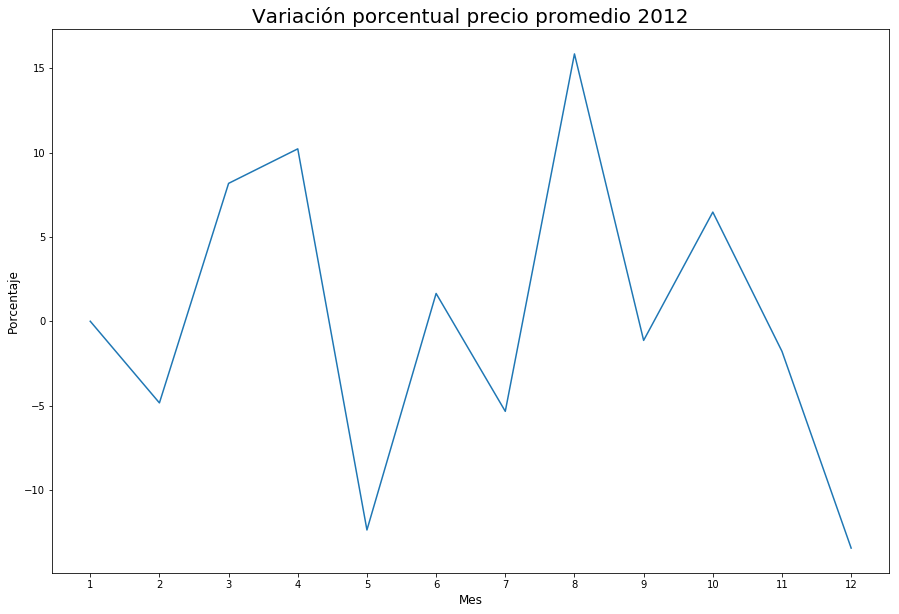

In [48]:
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, variation_2012)
plt.title('Variación porcentual precio promedio 2012', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('indice_variacion_2012.png', bbox_inches = 'tight')
plt.show()

0     0.71
1     0.20
2     0.06
3    -0.31
4    -0.32
5     0.46
6     0.56
7     0.30
8     0.44
9     0.51
10    0.68
11    0.23
Name: Inflacion, dtype: float64


<Figure size 432x288 with 0 Axes>

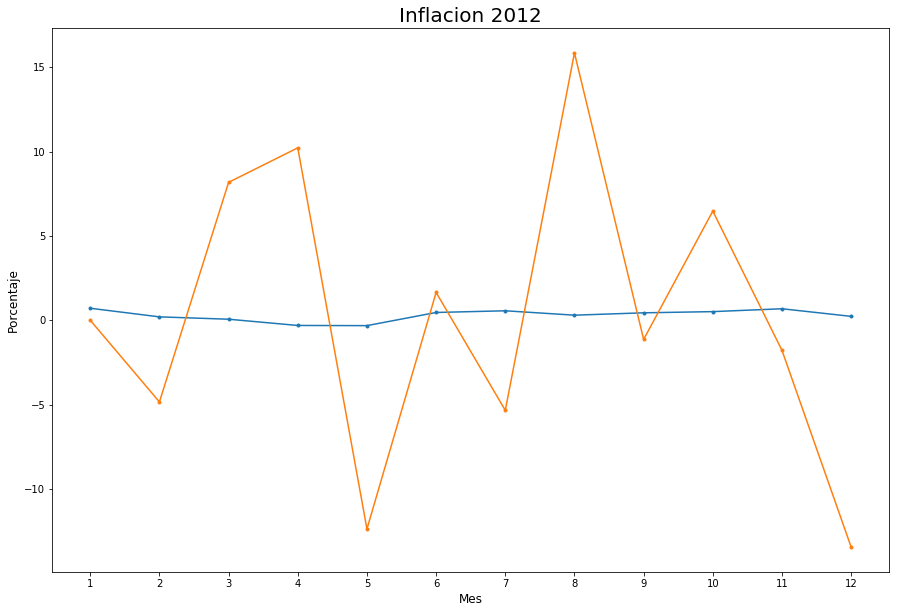

In [49]:
inflacion_2012 = inflacion_anio.get_group(2012)
print(inflacion_2012['Inflacion'])
plt.figure()
plt.subplots(figsize=(15,10))
plt.plot(mean_2016.index, inflacion_2012['Inflacion'], marker='.')
plt.plot(mean_2016.index, variation_2012, marker = '.')
plt.title('Inflacion 2012', fontsize=20)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.xticks(mean_2016.index)
plt.savefig('inflacion_2012.png', bbox_inches = 'tight')
plt.show()